# Final Data Cleansing and Exploration

In [90]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#reading from CSV
athlete_events = "athlete_events.csv (1).zip"

athlete_data = pd.read_csv(athlete_events)

In [92]:
#finding initial count of columns
athlete_data.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [93]:
#finding column properties
athlete_data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [94]:
#finding counts of each Olympic season type
athlete_data["Season"].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [95]:
#renaming NOC column to Counrty
athlete_data = athlete_data.rename({'NOC': 'Country'}, axis=1)

In [96]:
#dropping NA's in selected columns
athlete_drop_yr= athlete_data.dropna(subset = ['Year'])
athlete_drop_medal = athlete_data.dropna(subset = ['Medal'])
athlete_drop_sex = athlete_data.dropna(subset = ['Sex'])
athlete_drop_age = athlete_data.dropna(subset = ['Age'])

In [97]:
#creating dataframe to store medal data
medal_df = athlete_drop_medal

In [98]:
# shwoing columns with equal count to medals
medal_df.count()

ID         39783
Name       39783
Sex        39783
Age        39051
Height     31072
Weight     30456
Team       39783
Country    39783
Games      39783
Year       39783
Season     39783
City       39783
Sport      39783
Event      39783
Medal      39783
dtype: int64

In [99]:
# Sorting data by year from 1896 to 2016
data_by_year= medal_df.sort_values("Year")
data_by_year.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
23916,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold


# Final Data Analysis and Plots

In [100]:
# Summer Olympic Data
data_summer = data_by_year[data_by_year.Season == "Summer"]
data_summer.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
23916,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold


In [101]:
#Gender Count for Summer Games
gender_cnt_summer = data_summer.groupby(['Year','Sex','Season']).size().reset_index(name='Count')
gender_cnt_summer.head(1)

,Year,Sex,Season,Count
0,1896,M,Summer,143


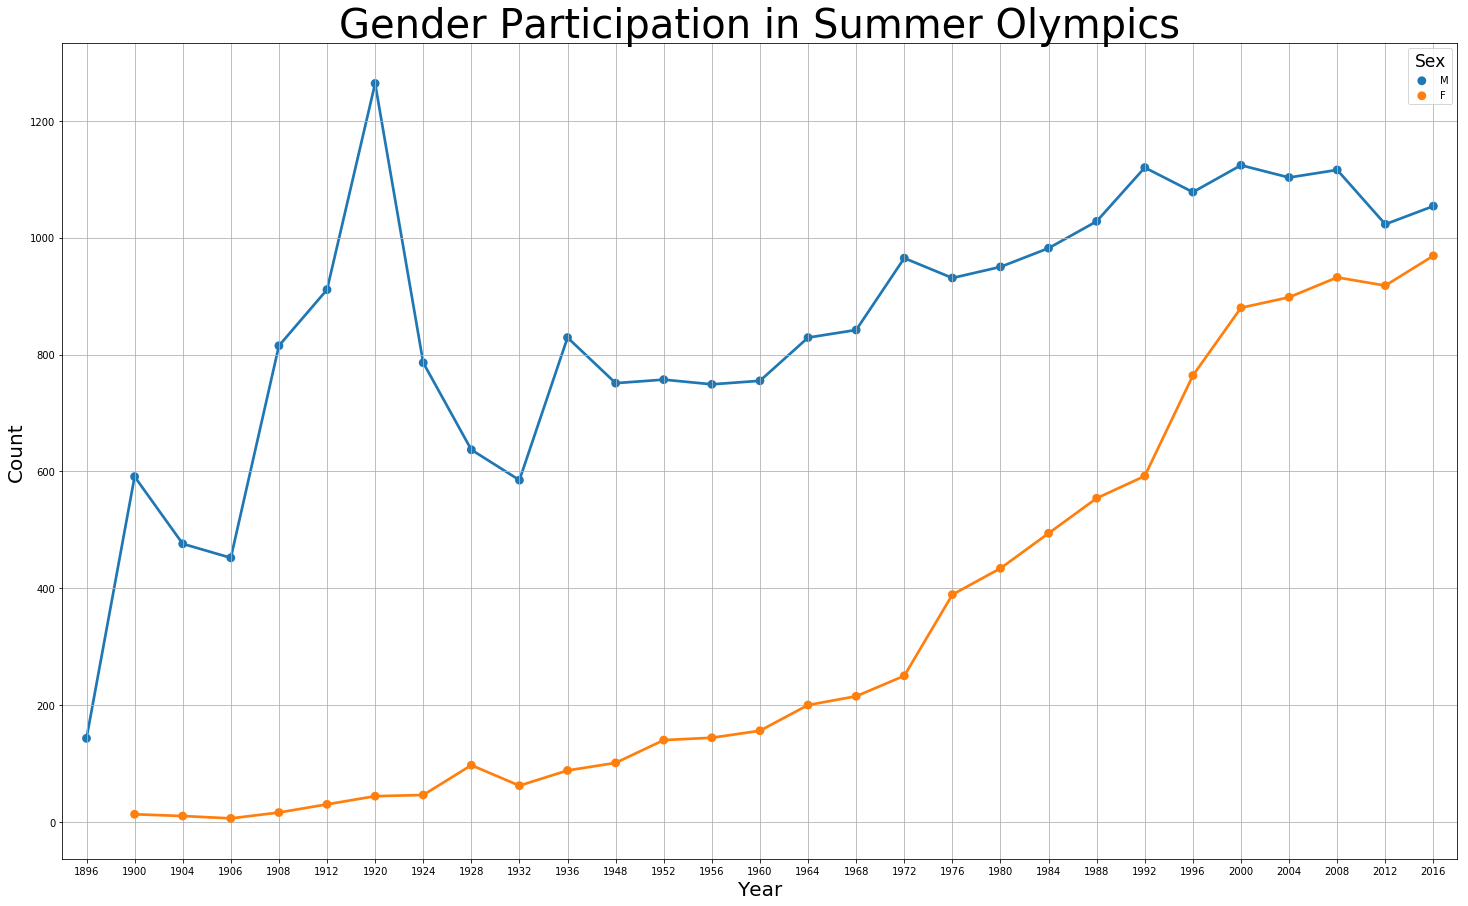

In [119]:
# Plot Time Series using Seaborn
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Summer Olympics",fontsize=40)

sns.pointplot(x="Year", y="Count", hue="Sex", data=gender_cnt_summer, ax= ax_s)
plt.grid(True)
plt.savefig("Images_gender_summer.png")
plt.show()

In [42]:
# Winter Olympic Data
data_winter = data_by_year[data_by_year.Season == "Winter"]
data_winter.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
255566,127948,Karl Edvard Wahlberg,M,49.0,NaN,NaN,Sweden,SWE,1924 Winter,1924,Winter,Chamonix,Curling,Curling Men's Curling,Silver


In [43]:
#Gender Count for Winter Games
gender_cnt_winter = data_winter.groupby(['Year','Sex','Season']).size().reset_index(name='Count')
gender_cnt_winter.head(1)

,Year,Sex,Season,Count
0,1924,F,Winter,6


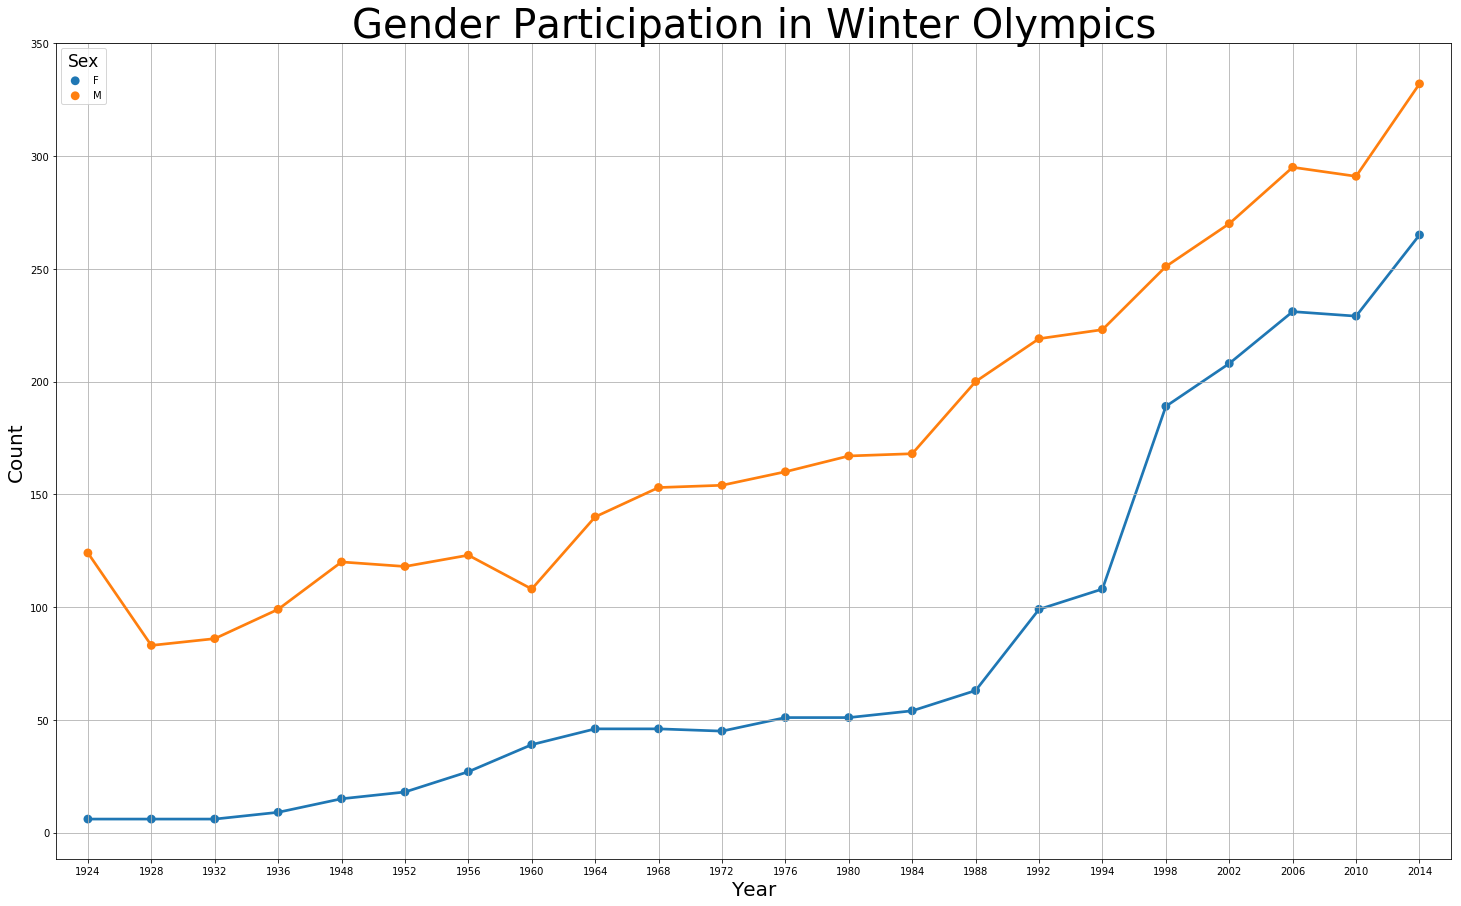

In [118]:
# Plot Time Series using Seaborn
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Winter Olympics",fontsize=40)

sns.pointplot(x="Year", y="Count", hue="Sex", data=gender_cnt_winter, ax= ax_s)
plt.grid(True)
plt.savefig("Images_gender_winter.png")
plt.show()

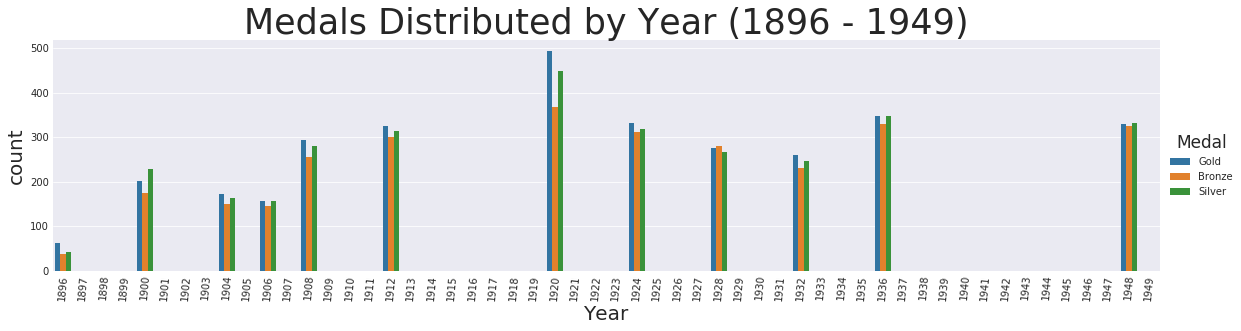

In [126]:
# Showing each Olympic Games with total medals for each medal category and any gaps(1896-1950)
with sns.axes_style('darkgrid'):
    medals_by_year = sns.factorplot("Year", data= medal_df, aspect=4.0, kind='count',
                       hue='Medal', order=range(1896, 1950))
plt.xticks(rotation=85)
plt.title("Medals Distributed by Year (1896 - 1949)",fontsize=35)
plt.savefig("Images_medalcounts_year.png")
g.set_ylabels('Medal')

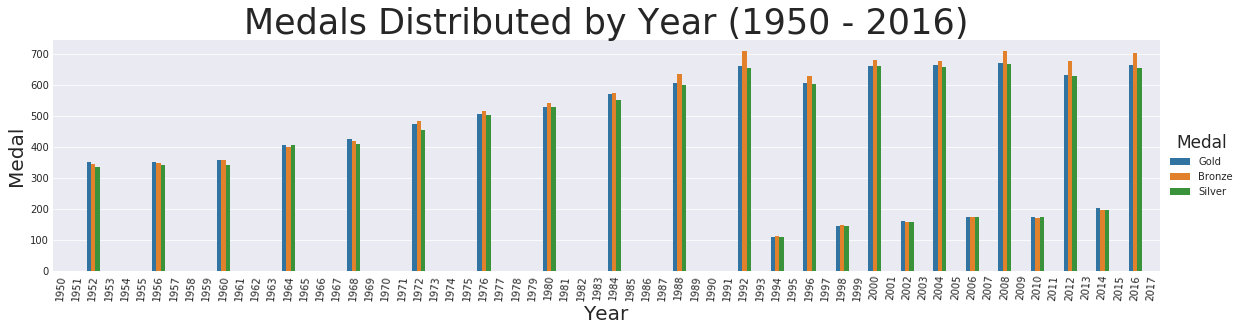

In [127]:
# Showing each Olympic Games with total medals for each medal category and any gaps(1950-2016)
with sns.axes_style('darkgrid'):
    g = sns.factorplot("Year", data= medal_df, aspect=4.0, kind='count',
                       hue='Medal', order=range(1950, 2018))
plt.xticks(rotation=85)
plt.title("Medals Distributed by Year (1950 - 2016)",fontsize=35)
plt.savefig("Images_medalcounts_year2.png")
g.set_ylabels('Medal')

In [47]:
# Gold Medal Winners since 1896
gold_winners= athlete_drop_medal[athlete_drop_medal["Medal"]=="Gold"]
# Silver Medal Winners since 1896
silver_winners= athlete_drop_medal[athlete_drop_medal["Medal"]=="Silver"]
# Bronze Medal Winners since 1896
bronze_winners= athlete_drop_medal[athlete_drop_medal["Medal"]=="Bronze"]

In [48]:
# Save top 10 medal winners by country
g_w_a = gold_winners['Team'].value_counts().sort_values(ascending=True)[-10:]
s_w_a = silver_winners['Team'].value_counts().sort_values(ascending=True)[-10:]
b_w_a = bronze_winners['Team'].value_counts().sort_values(ascending=True)[-10:]

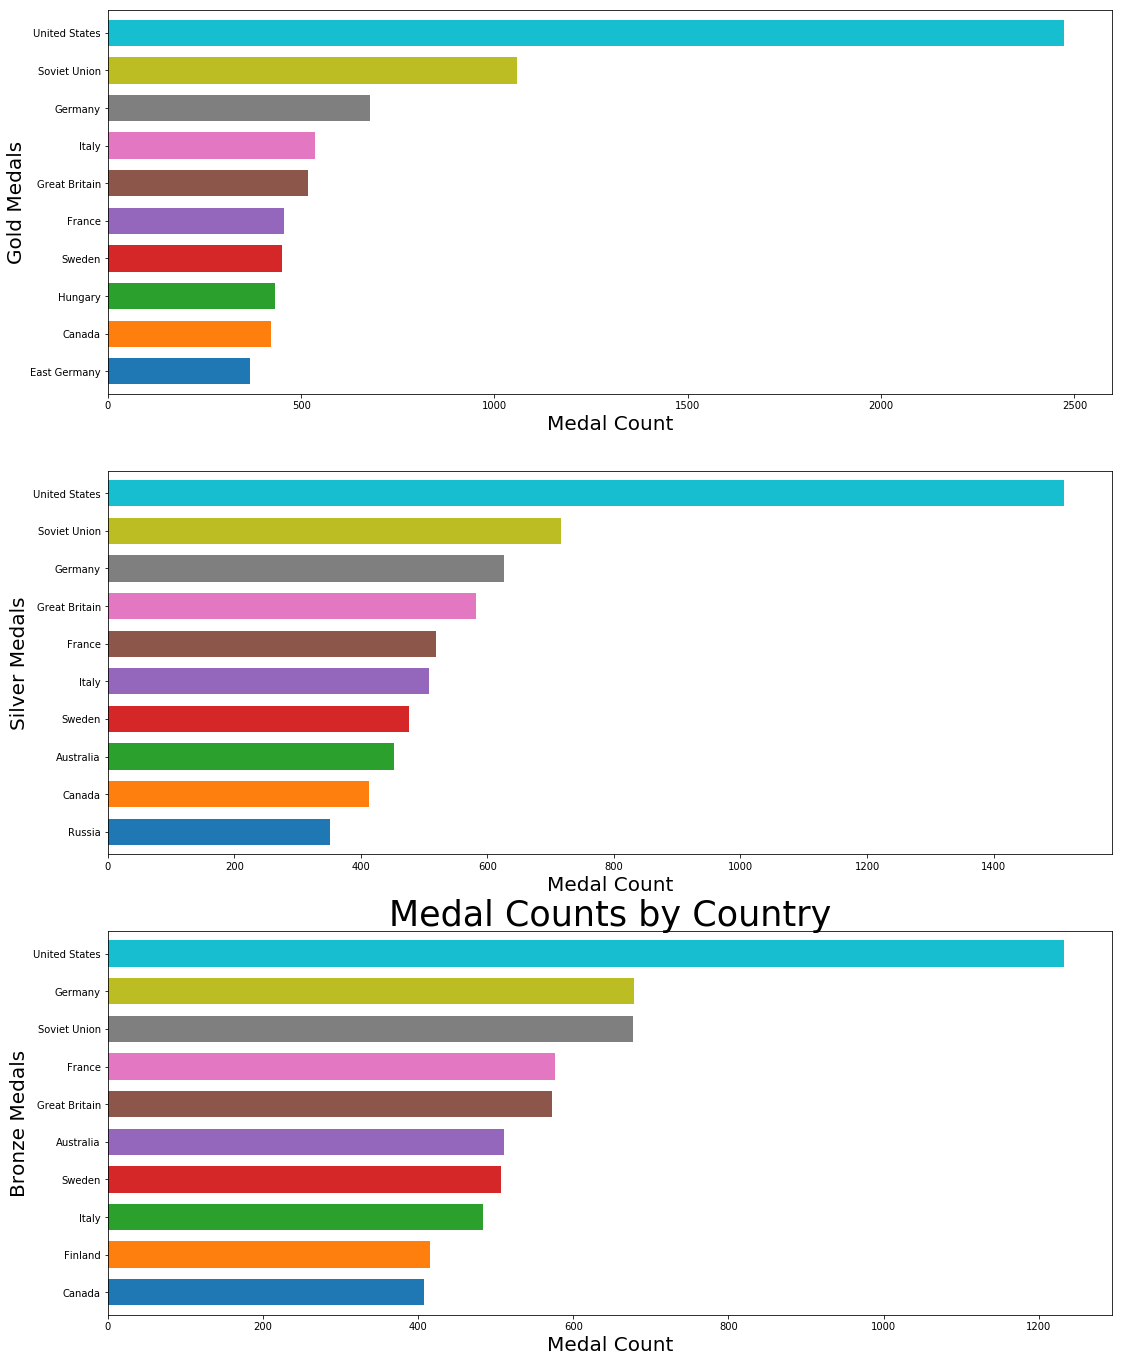

In [130]:
# Plotting with Horizontal View
plt.subplots(figsize=(18,24))
ax1 = plt.subplot(311)
g_w_a.plot.barh(width=.7)
ax2 = plt.subplot(312)
s_w_a.plot.barh(width=.7)
ax3 = plt.subplot(313)
b_w_a.plot.barh(width=.7)

plt.title("Medal Counts by Country", fontsize = 35)
ax1.set_xlabel('Medal Count')
ax2.set_xlabel('Medal Count')
ax3.set_xlabel('Medal Count')
ax1.set_ylabel('Gold Medals')
ax2.set_ylabel('Silver Medals')
ax3.set_ylabel('Bronze Medals')
plt.savefig("Images_medalcounts_country.png")
plt.show()

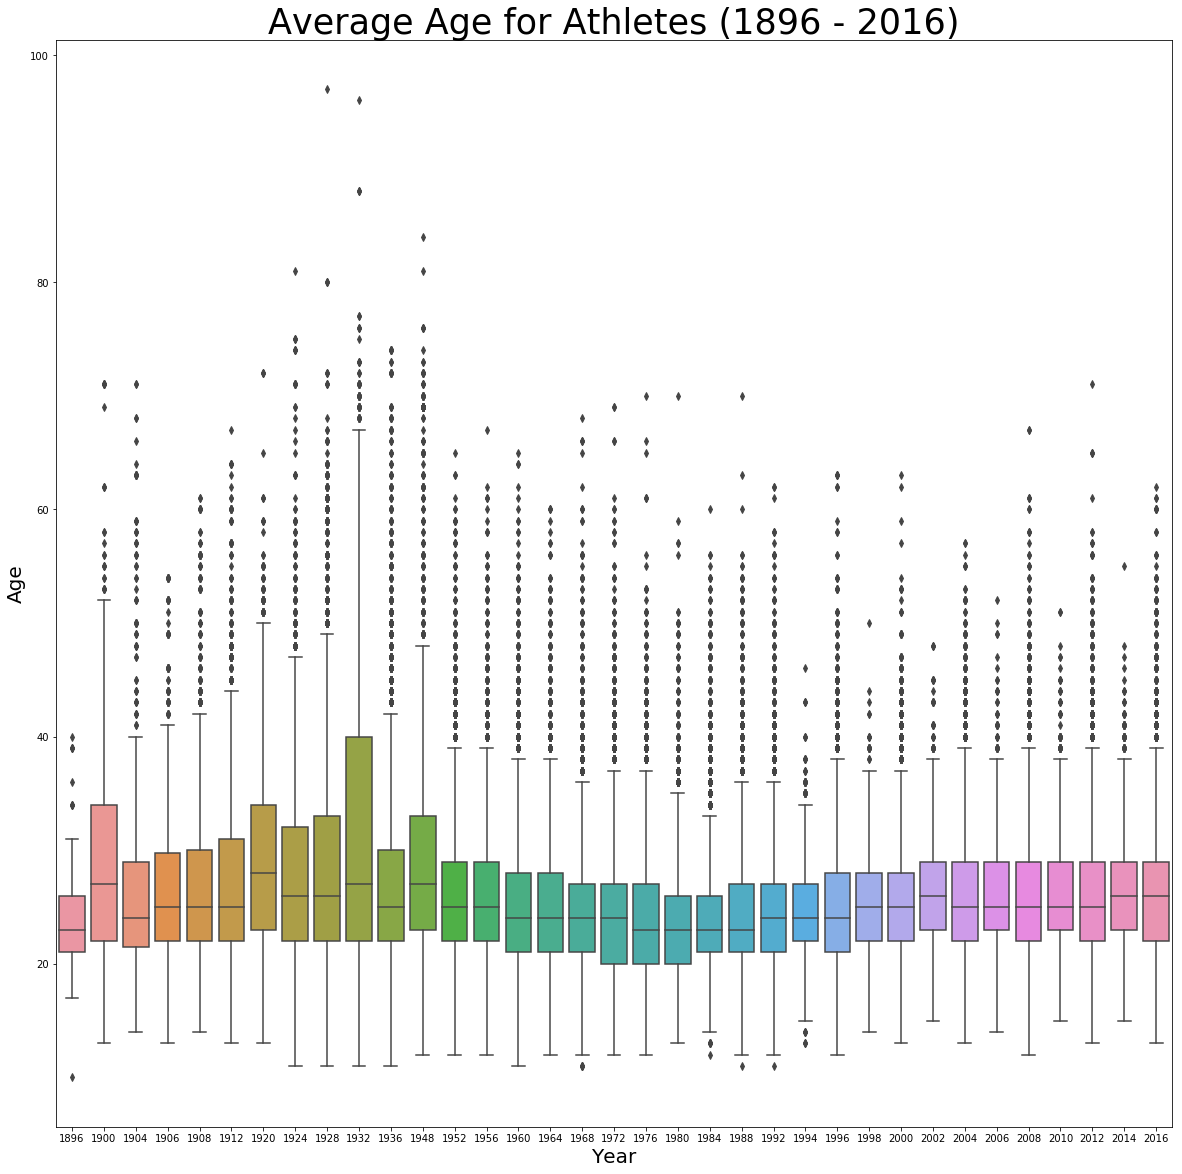

In [133]:
#Average Age Distribution of all athletes using BoxPlot
plt.figure(figsize=(20, 20))
sns.boxplot('Year', 'Age', data=athlete_data)
plt.title('Average Age for Athletes (1896 - 2016)', fontsize = 35)
plt.savefig("Images_avg_age_boxplot.png")


In [86]:
#Finding which sport has most medals by sport
top_medal_per_sport = athlete_data.groupby(['Country','Medal','Sport']).size().reset_index(name='Count')

In [87]:
sport_by_count= top_medal_per_sport.sort_values(["Count"], ascending=[False])

In [88]:
sport_by_count.head(10)

,Country,Medal,Sport,Count
3022,USA,Gold,Swimming,649
2991,USA,Gold,Athletics,542
3035,USA,Silver,Athletics,317
2993,USA,Gold,Basketball,281
3067,USA,Silver,Swimming,254
2946,USA,Bronze,Athletics,221
453,CAN,Gold,Ice Hockey,220
3051,USA,Silver,Ice Hockey,189
3013,USA,Gold,Rowing,186
2978,USA,Bronze,Swimming,175


In [89]:
#Selecting two sports to observe top Gold Medal winners
data_gymnastics=athlete_drop_medal[athlete_drop_medal.Sport=='Gymnastics']
winners=athlete_drop_medal[athlete_drop_medal.Medal=='Gold']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

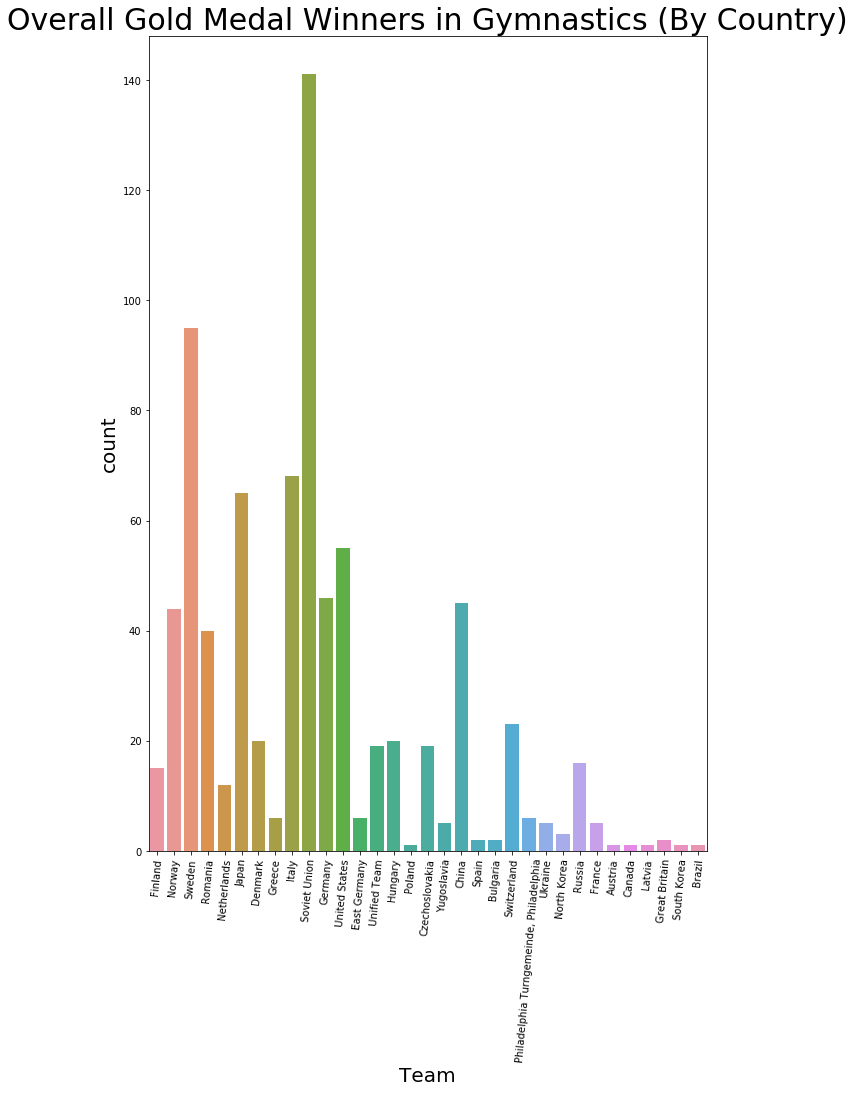

In [136]:
gymnastics_winners=winners[winners.Sport=='Gymnastics']
plt.figure(figsize=(10, 15))
sns.countplot(x="Team", data=gymnastics_winners)
plt.title('Overall Gold Medal Winners in Gymnastics (By Country)', fontsize = 30)
plt.savefig("Images_gymnastic_gold.png")
plt.xticks(rotation=85)


In [83]:
data_swimmers=athlete_drop_medal[athlete_drop_medal.Sport=='Swimming']
winners=athlete_drop_medal[athlete_drop_medal.Medal=='Gold']

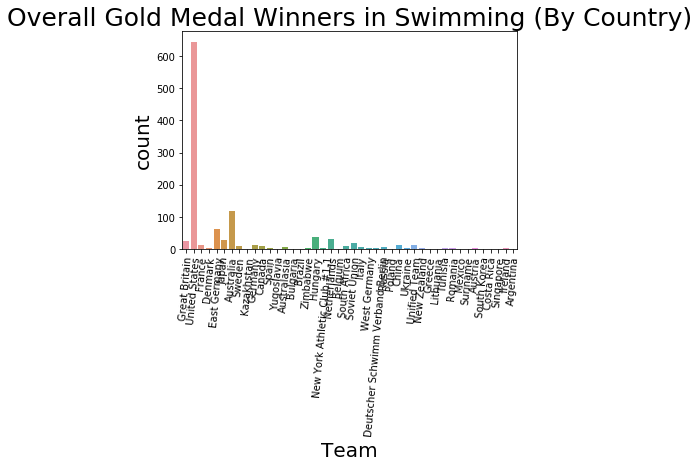

In [138]:
swimming_winners=winners[winners.Sport=='Swimming']
sns.countplot(x="Team", data=swimming_winners)
plt.xticks(rotation=85)
plt.title('Overall Gold Medal Winners in Swimming (By Country)', fontsize = 25)
plt.savefig("Images_swimming_gold.png")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text xticklabel objects>)

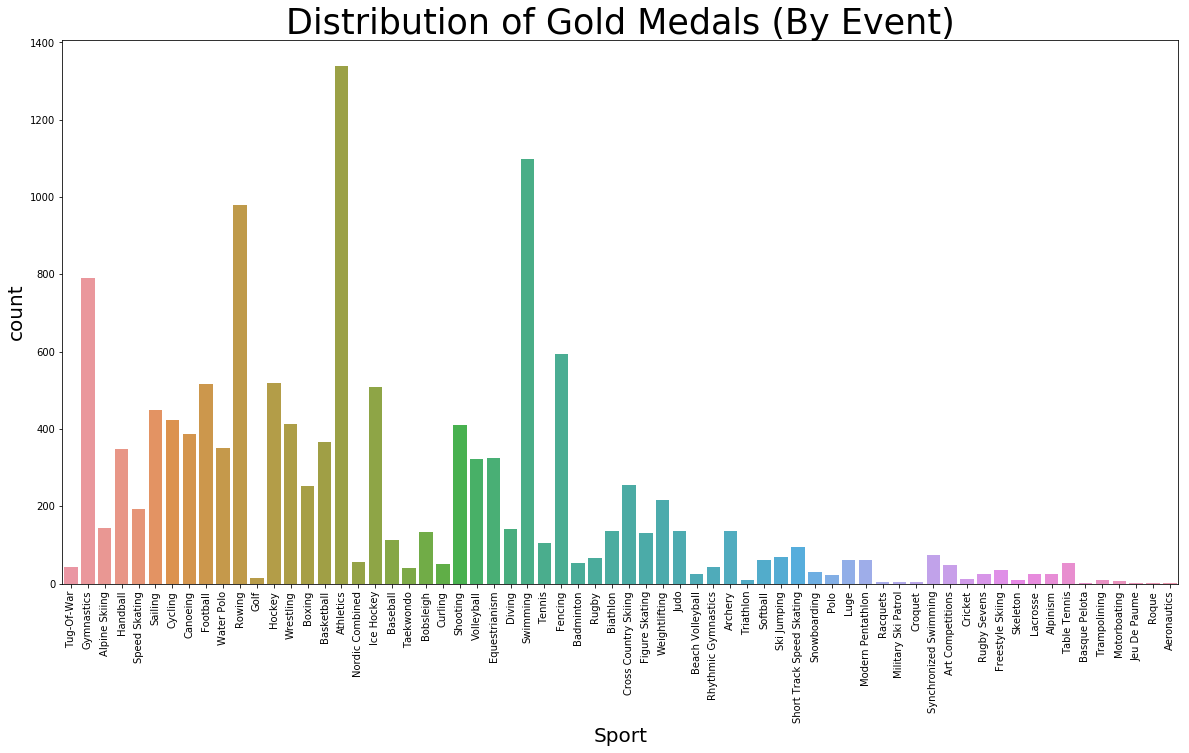

In [139]:
# evaluate gold medal distribution by event
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_winners["Sport"])
plt.title('Distribution of Gold Medals (By Event)', fontsize= 35)
plt.savefig("Images_gold_by_event.png")
plt.xticks(rotation=90)

# Make note of obscure events...Roque, Aeronautics, Basque Pelota